In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import visualkeras

2024-11-05 11:06:36.780991: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 11:06:36.782126: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 11:06:36.790339: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 11:06:36.815853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 11:06:36.860587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, M_y_test) = keras.datasets.fashion_mnist.load_data()

M_x_train = x_train.astype("float32") / 255.0
M_x_test = x_test.astype("float32") / 255.0

# Розширення розмірності для згорткових шарів
M_x_train = np.expand_dims(x_train, -1)
M_x_test = np.expand_dims(x_test, -1)

# Розділення на тренувальний та валідаційний набори
val_size = 10000
M_x_val = x_train[-val_size:]
M_y_val = y_train[-val_size:]
M_x_train = x_train[:-val_size]
M_y_train = y_train[:-val_size]

In [3]:
(x_train, y_train), (x_test, C_y_test) = keras.datasets.cifar10.load_data()

C_x_train = x_train.astype("float32") / 255.0
C_x_test = x_test.astype("float32") / 255.0

val_size = 10000
C_x_val = C_x_train[-val_size:]
C_y_val = y_train[-val_size:]
C_x_train = C_x_train[:-val_size]
C_y_train = y_train[:-val_size]

In [4]:
M_x_train.shape, C_x_train.shape

((50000, 28, 28), (40000, 32, 32, 3))

In [3]:
M_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
C_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def train_model(model, epochs=50, batch_size=256, x_train=M_x_train, y_train=M_y_train, x_val=M_x_val, y_val=M_y_val):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val),
                        epochs=epochs, 
                        batch_size=batch_size)
    return history

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_classification_report(model, x, y, class_names=M_class_names):
    y_pred = model.predict(x)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y, y_pred_classes, target_names=class_names))

def classify_random_samples(model, x, y, num_samples=20, class_names=None, dataset='mnist'):
    if class_names is None:
        raise ValueError("class_names must be provided")

    indices = np.random.choice(len(x), num_samples, replace=False)
    x_samples = x[indices]
    y_samples = y[indices]
    
    y_pred = model.predict(x_samples)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            if dataset == 'mnist':
                ax.imshow(x_samples[i].reshape(28, 28), cmap='gray')
            elif dataset == 'cifar10':
                ax.imshow(x_samples[i])
            
            true_label = class_names[y_samples[i].item()]  # Use .item() to convert to scalar
            pred_label = class_names[y_pred_classes[i]]
            color = 'green' if true_label == pred_label else 'red'
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
def create_model_1():
    model = keras.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [9]:
model_1 = create_model_1()
history_1 = train_model(model_1)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1726 - loss: 11.0407 - val_accuracy: 0.2961 - val_loss: 1.6889
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3130 - loss: 1.6396 - val_accuracy: 0.3487 - val_loss: 1.5230
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3955 - loss: 1.4704 - val_accuracy: 0.4955 - val_loss: 1.2641
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5256 - loss: 1.2328 - val_accuracy: 0.5678 - val_loss: 1.1410
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5826 - loss: 1.1033 - val_accuracy: 0.5992 - val_loss: 1.0550
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6403 - loss: 0.9838 - val_accuracy: 0.6684 - val_loss: 0.9374
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6718 - loss: 0.8925 - val_accuracy: 0.6663 - val_loss: 0.8684
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6953 - loss: 0.8247 - val_acc

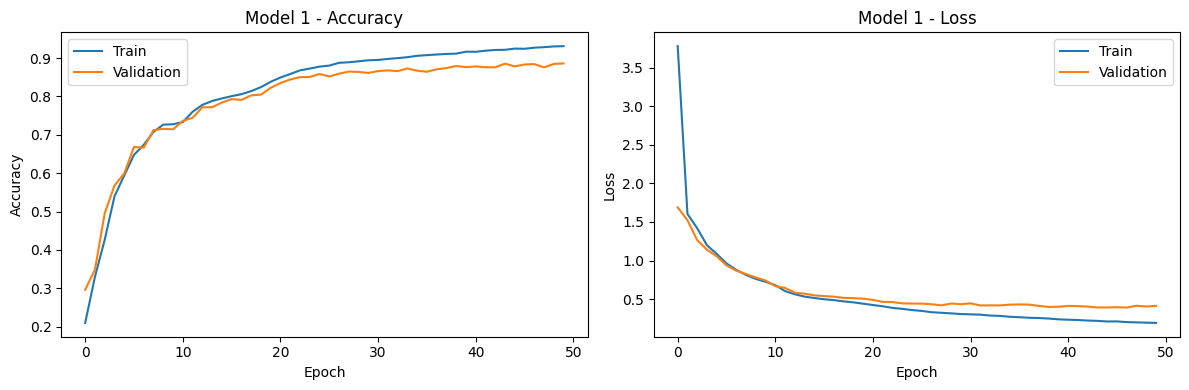

In [10]:
plot_learning_curve(history_1, 'Model 1')

In [11]:
print("Model 1 Classification Report:")
print_classification_report(model_1, M_x_test, M_y_test)

Model 1 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.80      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.79      0.86      0.82      1000
       Dress       0.88      0.87      0.88      1000
        Coat       0.79      0.86      0.82      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.73      0.64      0.68      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



Model 1 Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


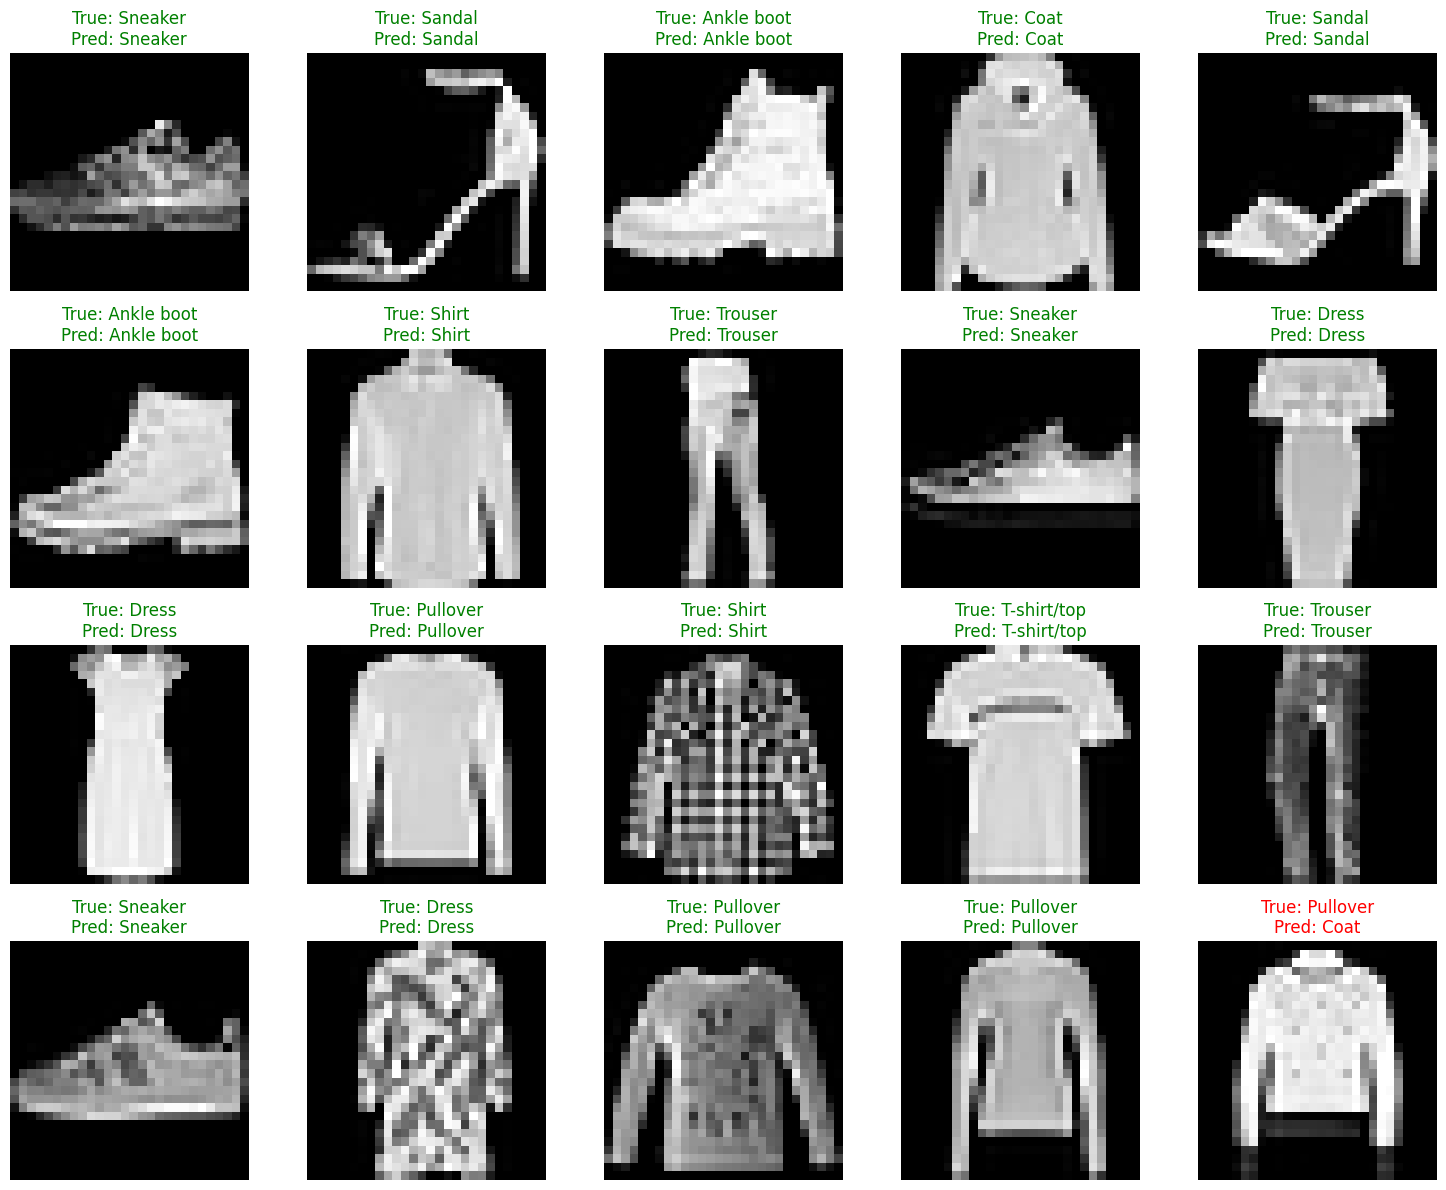

In [12]:
print("Model 1 Random Sample Classification:")
classify_random_samples(model_1, M_x_test, M_y_test, class_names=M_class_names)

In [13]:
def create_model_cifar10():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [14]:
cifar_model = create_model_cifar10()
cifar_hist = train_model(cifar_model, x_train=C_x_train, y_train=C_y_train, x_val=C_x_val, y_val=C_y_val)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.2651 - loss: 1.9807 - val_accuracy: 0.4371 - val_loss: 1.5339
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.4732 - loss: 1.4557 - val_accuracy: 0.5302 - val_loss: 1.3234
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.5436 - loss: 1.2768 - val_accuracy: 0.5545 - val_loss: 1.2358
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.5957 - loss: 1.1578 - val_accuracy: 0.5963 - val_loss: 1.1459
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.6247 - loss: 1.0758 - val_accuracy: 0.6032 - val_loss: 1.1334
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.6440 - loss: 1.0148 - val_accuracy: 0.6414 - val_loss: 1.0189
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.6730 - loss: 0.9312 - val_accuracy: 0.6293 - val_loss: 1.0513
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.6931 - loss: 0

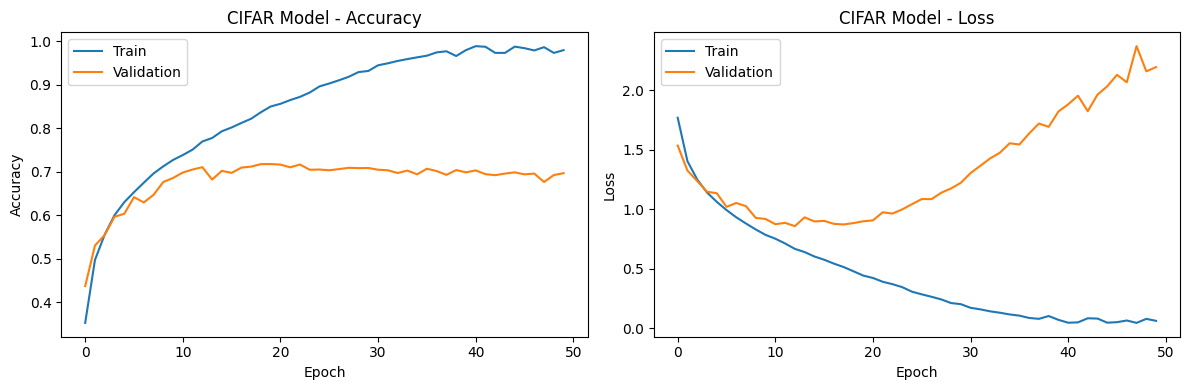

In [15]:
plot_learning_curve(cifar_hist, 'CIFAR Model')

In [16]:
print("CIFAR Model Classification Report:")
print_classification_report(cifar_model, C_x_test, C_y_test, class_names=C_class_names)

CIFAR Model Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.69      0.72      1000
  automobile       0.79      0.81      0.80      1000
        bird       0.53      0.64      0.58      1000
         cat       0.46      0.56      0.51      1000
        deer       0.67      0.57      0.62      1000
         dog       0.62      0.49      0.55      1000
        frog       0.73      0.76      0.75      1000
       horse       0.72      0.75      0.73      1000
        ship       0.78      0.83      0.80      1000
       truck       0.84      0.72      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



CIFAR Model Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


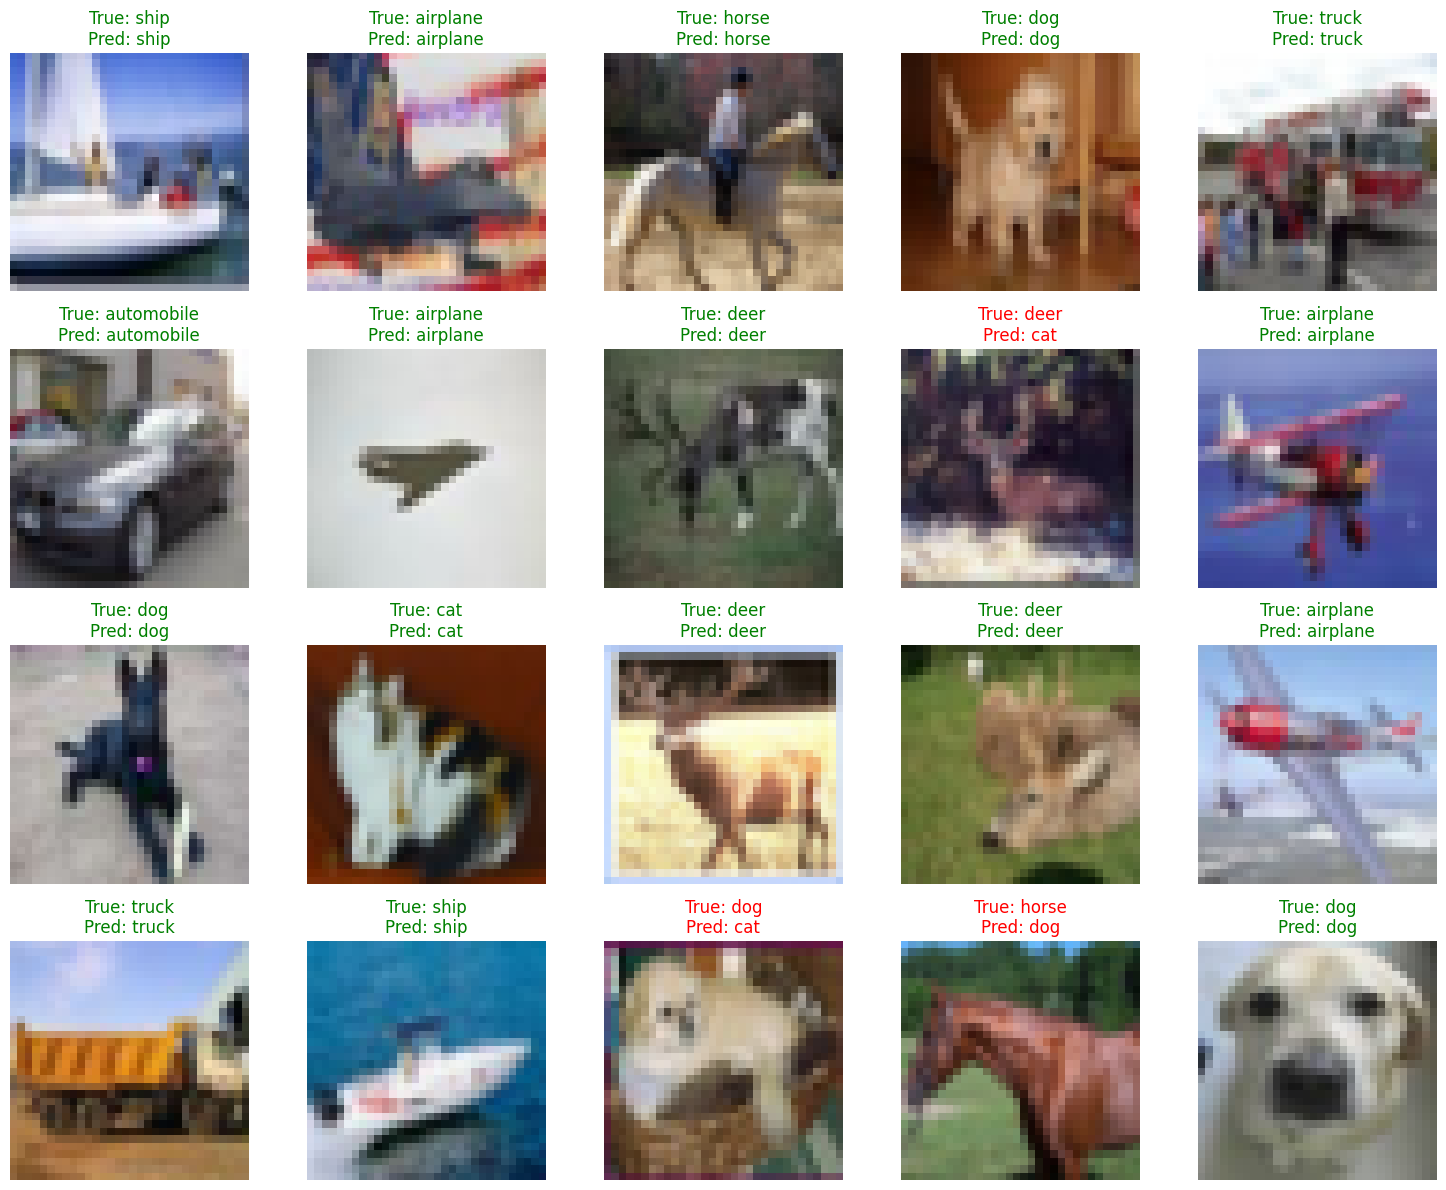

In [17]:
print("CIFAR Model Random Sample Classification:")
classify_random_samples(cifar_model, C_x_test, C_y_test, class_names=C_class_names, dataset='cifar10')

In [18]:
base_model = create_model_cifar10()
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def create_transfer_mnist_model(base_model):
    for layer in base_model.layers[:-1]:
        layer.trainable = False
    
    model = keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Resizing(32, 32),  # Змінюємо розмір вхідних даних
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu'),
        base_model.layers[1],  # MaxPooling2D
        base_model.layers[2],  # Conv2D
        base_model.layers[3],  # MaxPooling2D
        base_model.layers[4],  # Conv2D
        base_model.layers[5],  # Flatten
        base_model.layers[6],  # Dense
        layers.Dense(10, activation='softmax')  # Новий вихідний шар для 10 класів Fashion MNIST
    ])
    return model

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
transfer_mnist_model = create_transfer_mnist_model(base_model)
transfer_mnist_hist = train_model(transfer_mnist_model)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/lab-4/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.2345 - loss: 2.1566 - val_accuracy: 0.6358 - val_loss: 1.3371
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.6606 - loss: 1.1707 - val_accuracy: 0.7173 - val_loss: 0.8765
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.7252 - loss: 0.8385 - val_accuracy: 0.7384 - val_loss: 0.7598
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7397 - loss: 0.7435 - val_accuracy: 0.7454 - val_loss: 0.7061
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7492 - loss: 0.7020 - val_accuracy: 0.7592 - val_loss: 0.6735
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7557 - loss: 0.6692 - val_accuracy: 0.7678 - val_loss: 0.6471
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.7648 - loss: 0.6463 - val_accuracy: 0.7716 - val_loss: 0.6282
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.7724 - loss: 0.6219 - 

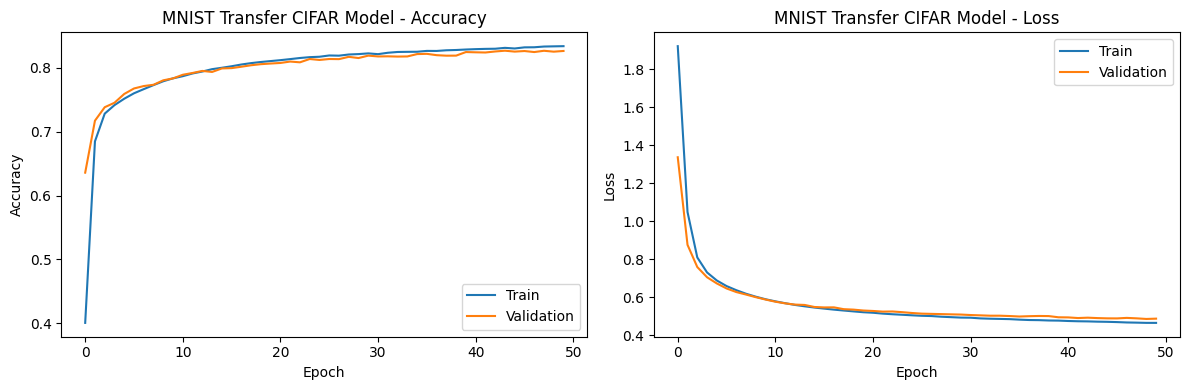

In [20]:
plot_learning_curve(transfer_mnist_hist, 'MNIST Transfer CIFAR Model')

MNSIT Transfer Model Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


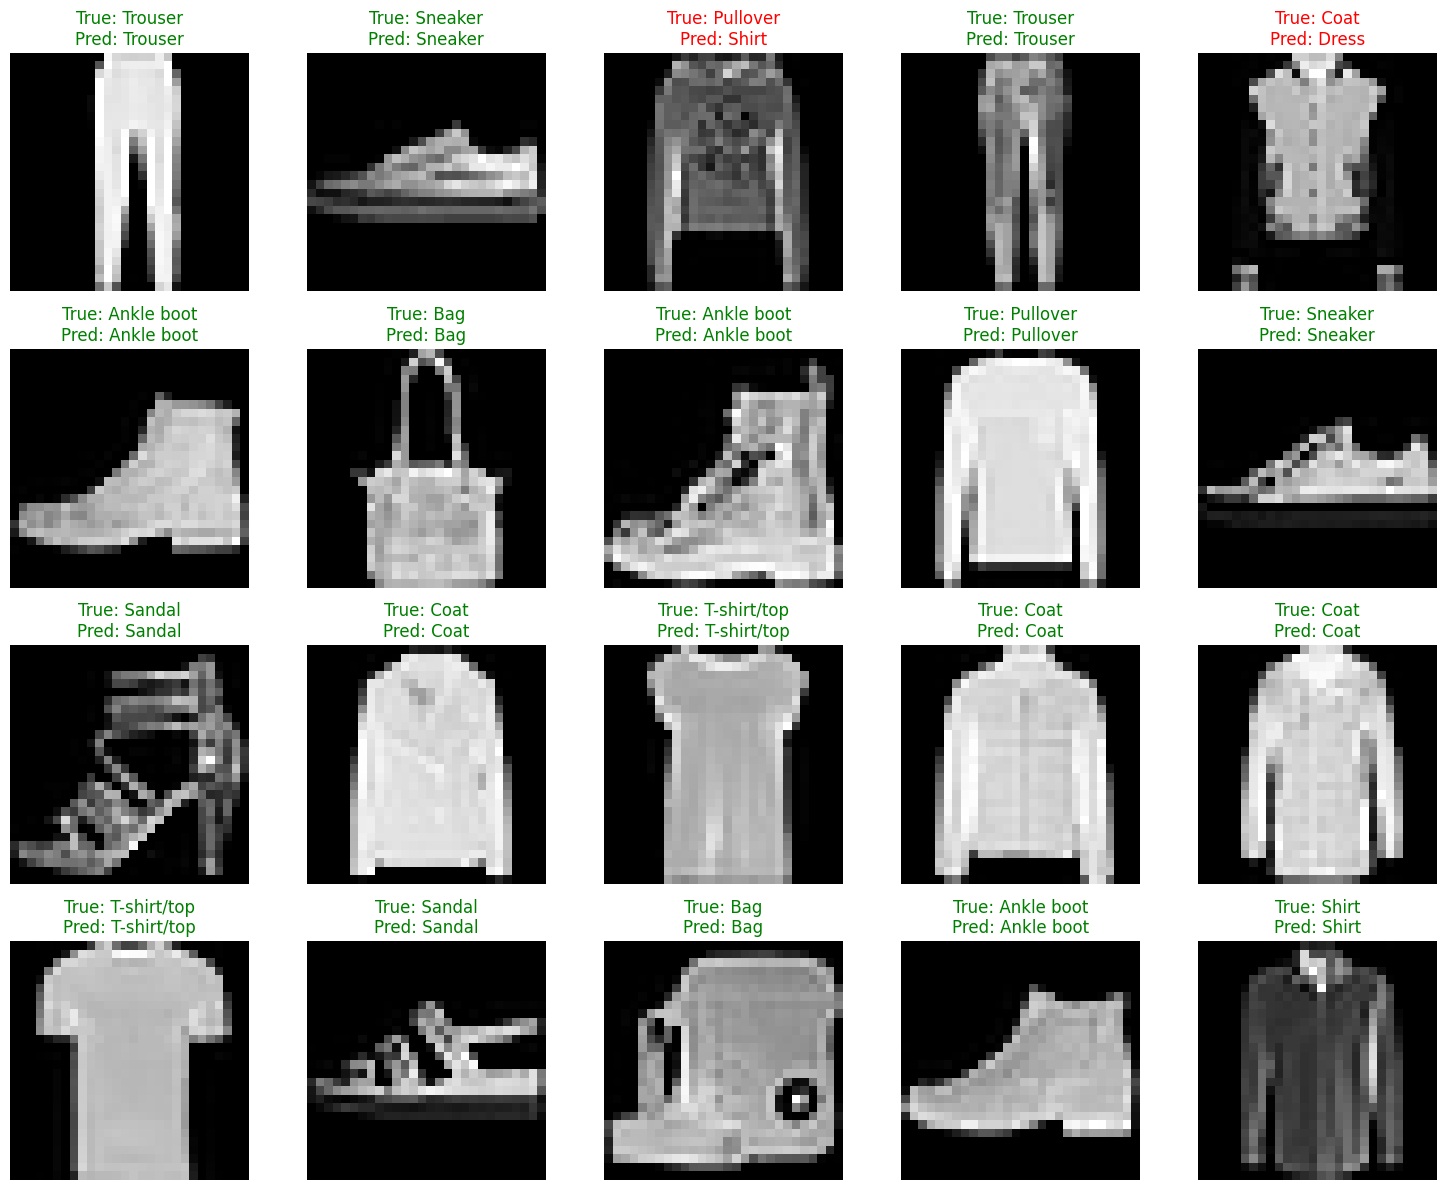

In [21]:
print("MNSIT Transfer Model Random Sample Classification:")
classify_random_samples(transfer_mnist_model, M_x_test, M_y_test, class_names=M_class_names)

In [12]:
def create_transfer_learning_model(input_shape=(64, 64, 3), num_classes=10):
    # Завантаження MobileNet як базової моделі з меншим розміром
    base_model = tf.keras.applications.MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Заморожуємо базову модель

    # Додаємо шари для зміни розміру та класифікації
    model = models.Sequential([
        layers.Resizing(64, 64, input_shape=(28, 28, 1)),  # Менший розмір
        layers.Conv2D(3, (3, 3), padding='same', activation='relu'),  # Конвертація до 3 каналів
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # 10 класів для Fashion MNIST
    ])
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
new_transfer_mnsit_model = create_transfer_learning_model()
new_mnsit_hist = train_model(new_transfer_mnsit_model, epochs=10)

/tmp/ipykernel_129296/859596965.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 164s 805ms/step - accuracy: 0.7239 - loss: 0.8351 - val_accuracy: 0.8459 - val_loss: 0.4070
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 155s 790ms/step - accuracy: 0.8576 - loss: 0.3832 - val_accuracy: 0.8619 - val_loss: 0.3678
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 155s 789ms/step - accuracy: 0.8751 - loss: 0.3319 - val_accuracy: 0.8624 - val_loss: 0.3628
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 162s 828ms/step - accuracy: 0.8875 - loss: 0.3061 - val_accuracy: 0.8681 - val_loss: 0.3496
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 157s 799ms/step - accuracy: 0.8880 - loss: 0.2974 - val_accuracy: 0.8717 - val_loss: 0.3417
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 166s 847ms/step - accuracy: 0.8965 - loss: 0.2734 - val_accuracy: 0.8711 - val_loss: 0.3484
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 160s 814ms/step - accuracy: 0.9037 - loss: 0.2589 - val_accuracy: 0.8676 - val_loss: 0.3578
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 156s 795ms/step - accuracy: 0.9072 -

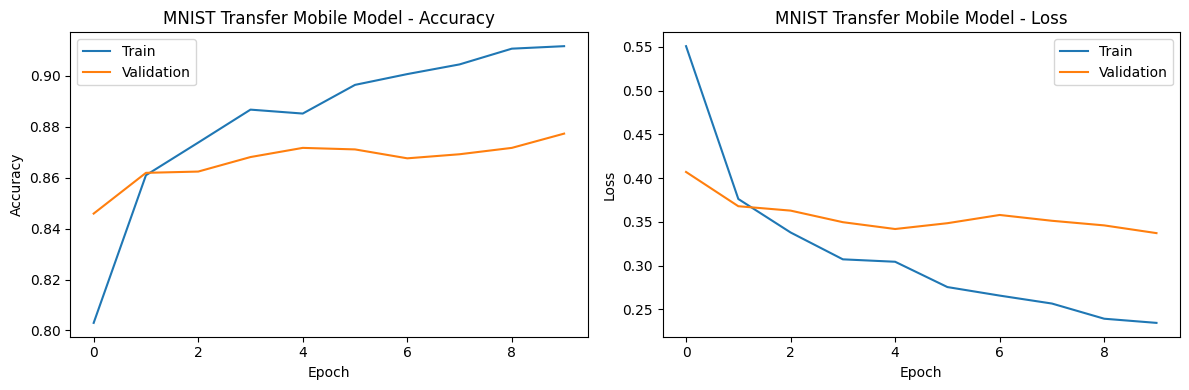

In [15]:
plot_learning_curve(new_mnsit_hist, 'MNIST Transfer Mobile Model')

In [16]:
print("MNIST Transfer Mobile Model Classification Report:")
print_classification_report(new_transfer_mnsit_model, M_x_test, M_y_test)

MNIST Transfer Mobile Model Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.80      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.80      0.79      0.79      1000
       Dress       0.86      0.87      0.87      1000
        Coat       0.75      0.77      0.76      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.65      0.69      0.67      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



MNIST Transfer Mobile Model Random Sample Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


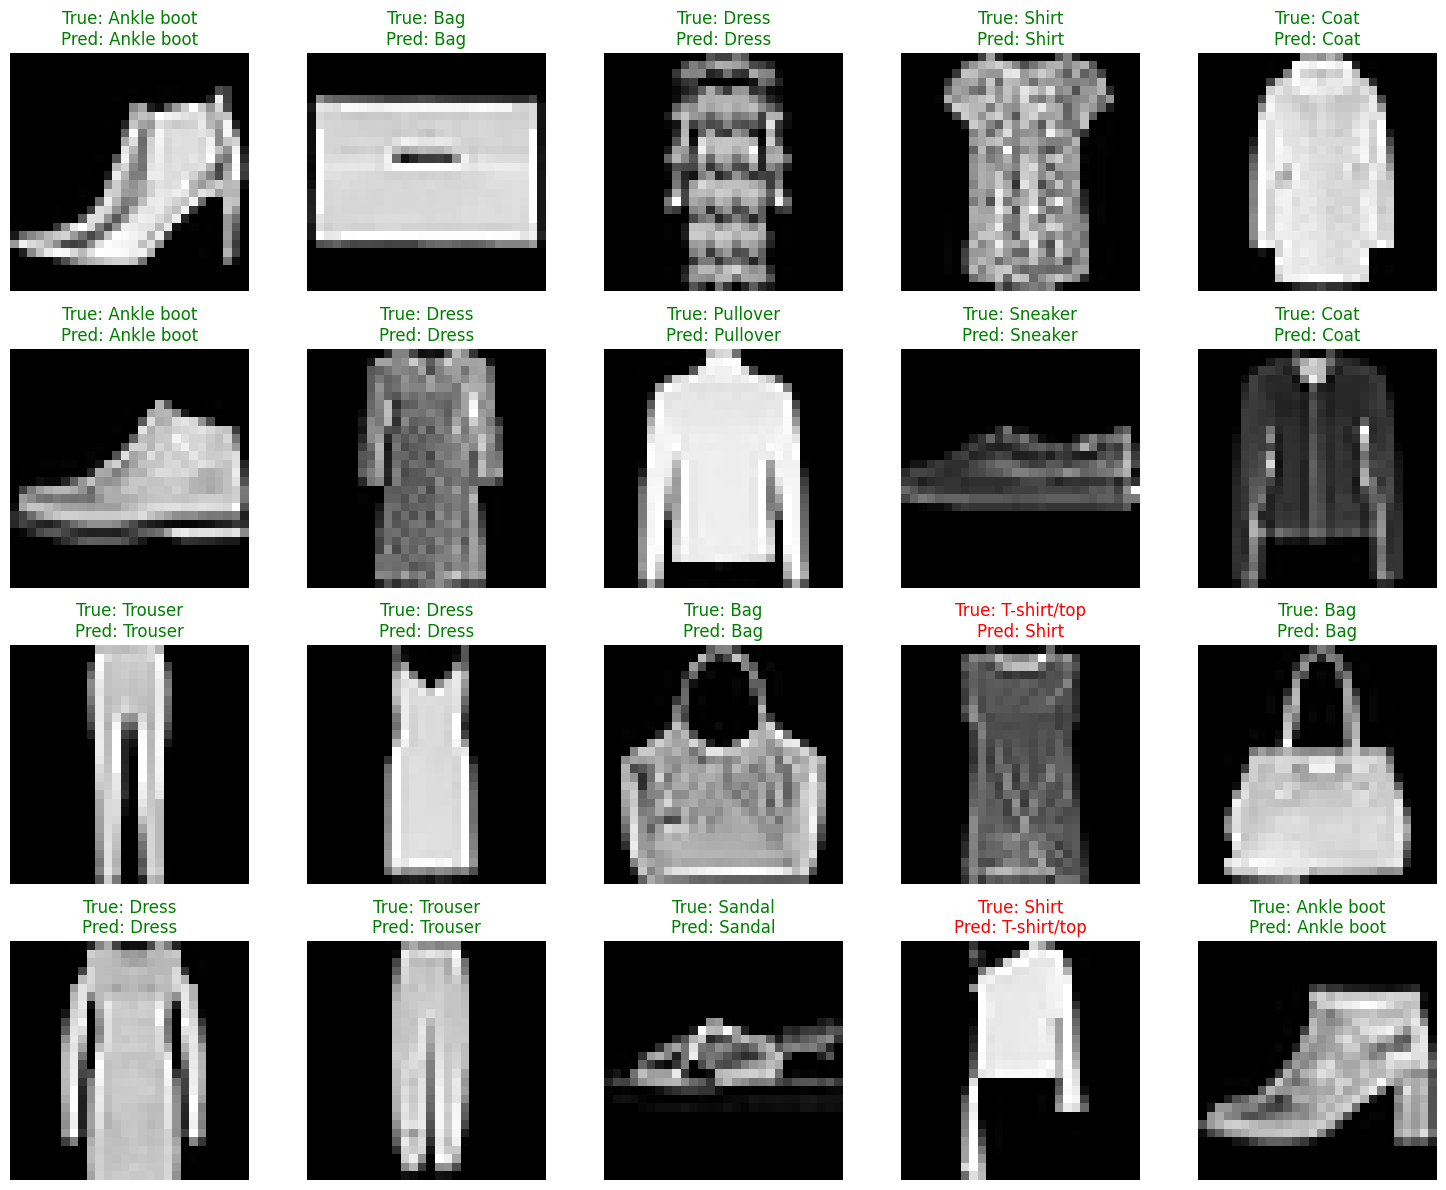

In [17]:
print("MNIST Transfer Mobile Model Random Sample Classification:")
classify_random_samples(new_transfer_mnsit_model, M_x_test, M_y_test, class_names=M_class_names)